## Import the required libraries first

In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from 

In [2]:
# define the data directories

train_dir = '../data/train'
test_dir = '../data/test'

In [4]:
# the available size of images
IMG_SIZE = (48, 48)

Data Augmentation helps in building a model that is robust to various possible changes in the test images. At the same time helping us to increase the dataset

In [5]:
train_datagen = ImageDataGenerator(rotation_range = 45,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   horizontal_flip = True,
                                   rescale = 1./255,
                                   validation_split = 0.2)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                        validation_split = 0.2)

In [6]:
# let's generate the imgaes (augementation) 
# while reading from the data source directory

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = IMG_SIZE,
                                                    batch_size = 64,
                                                    color_mode = 'grayscale',
                                                    class_mode = 'categorical',
                                                    subset = 'training')

validation_generator = validation_datagen.flow_from_directory(directory = test_dir,
                                                              target_size = IMG_SIZE,
                                                              batch_size = 64,
                                                              color_mode = 'grayscale',
                                                              class_mode = 'categorical',
                                                              subset = 'validation')

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [10]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same',activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(128, (5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = Adam(lr=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
epochs = 50
batch_size = 64

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)       

In [13]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/50
359/359 [==============================] - 401s 1s/step - loss: 8.8818 - accuracy: 0.1602 - val_loss: 8.0370 - val_accuracy: 0.2472
Epoch 2/50
359/359 [==============================] - 400s 1s/step - loss: 7.6213 - accuracy: 0.1794 - val_loss: 7.1595 - val_accuracy: 0.1962
Epoch 3/50
359/359 [==============================] - 396s 1s/step - loss: 6.9482 - accuracy: 0.1928 - val_loss: 6.4726 - val_accuracy: 0.2011
Epoch 4/50
359/359 [==============================] - 401s 1s/step - loss: 6.4363 - accuracy: 0.2031 - val_loss: 6.0721 - val_accuracy: 0.2256
Epoch 5/50
359/359 [==============================] - 402s 1s/step - loss: 6.0829 - accuracy: 0.2020 - val_loss: 5.8022 - val_accuracy: 0.2165
Epoch 6/50
359/359 [==============================] - 399s 1s/step - loss: 5.7813 - accuracy: 0.2056 - val_loss: 5.4959 - val_accuracy: 0.2318
Epoch 7/50
359/359 [==============================] - 399s 1s/step - loss: 5.5330 - accuracy: 0.2077 - val_loss: 5.2946 - val_accuracy: 0.2388

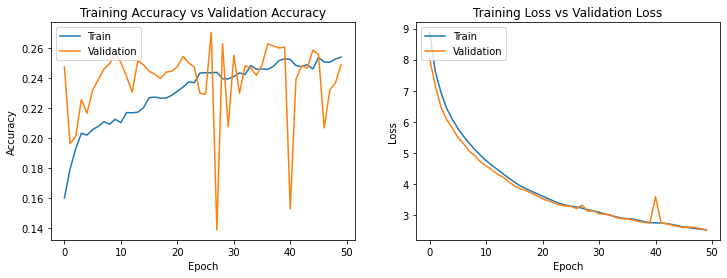

In [17]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')